In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from colab_Custom_dataset import CustomDataset

from glob import glob
import os

In [2]:
adult_train = pd.read_csv('./dataset/ECG_adult_age_train.csv')
child_train = pd.read_csv('./dataset/ECG_child_age_train.csv')

In [3]:
adult_file_path = './dataset/ECG_adult_numpy_train/'
child_file_path = './dataset/ECG_child_numpy_train/'

In [4]:
adult_train_dataset = CustomDataset(adult_file_path,adult_train)
child_dataset = CustomDataset(child_file_path,child_train)

# Adult - Train Set

In [2]:
adult_train = pd.read_csv('./dataset/ECG_adult_age_train.csv')

In [4]:
adult_train.columns

Index(['FILENAME', 'GENDER', 'AGE'], dtype='object')

In [97]:
adult_train.head(5)

,FILENAME,GENDER,AGE
0,ecg_adult_0,MALE,53
1,ecg_adult_1,MALE,68
2,ecg_adult_2,MALE,68
3,ecg_adult_3,MALE,89
4,ecg_adult_4,MALE,79


In [15]:
for col, value in zip(np.unique(adult_train.GENDER.values,return_counts=True)[0],np.unique(adult_train.GENDER.values,return_counts=True)[1]):
    print(f'{col} : {value}')

FEMALE : 18096
MALE : 16787
unknown : 24


## 전체 나이 분포

나이 분포
count    34907.000000
mean        60.845933
std         16.449994
min         19.000000
25%         51.000000
50%         64.000000
75%         73.000000
max        122.000000
Name: AGE, dtype: float64


[Text(0, 0, '2159'),
 Text(0, 0, '2462'),
 Text(0, 0, '3486'),
 Text(0, 0, '6247'),
 Text(0, 0, '9501'),
 Text(0, 0, '8003'),
 Text(0, 0, '2921'),
 Text(0, 0, '123'),
 Text(0, 0, '1'),
 Text(0, 0, '4')]

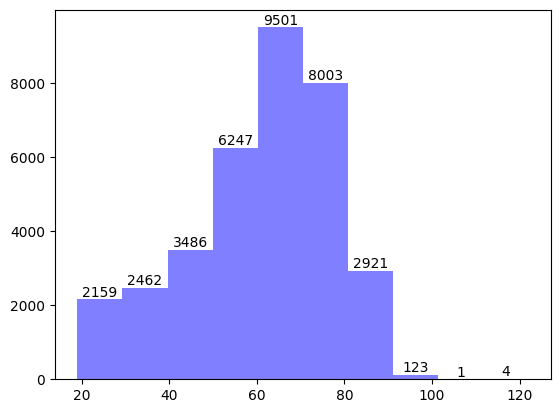

In [62]:
print('나이 분포')
print(adult_train.AGE.describe())
counts, edges, bars_1 = plt.hist(adult_train.AGE,alpha=0.5,color='blue')
plt.bar_label(bars_1)

## 성별 나이 분포

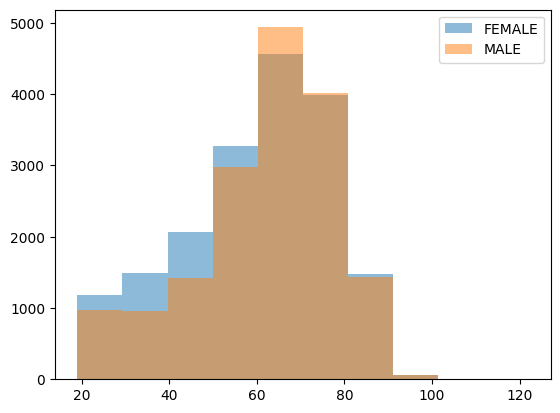

In [36]:
plt.hist(adult_train[adult_train['GENDER'] == 'FEMALE'].AGE,alpha=0.5, label = 'FEMALE')
plt.hist(adult_train[adult_train['GENDER'] == 'MALE'].AGE,alpha=0.5, label = 'MALE')
plt.legend(loc='upper right')
plt.show()

여성 나이 분포
count    18096.000000
mean        59.873508
std         16.803175
min         19.000000
25%         49.000000
50%         63.000000
75%         73.000000
max        122.000000
Name: AGE, dtype: float64


[Text(0, 0, '1179'),
 Text(0, 0, '1492'),
 Text(0, 0, '2068'),
 Text(0, 0, '3267'),
 Text(0, 0, '4559'),
 Text(0, 0, '3990'),
 Text(0, 0, '1480'),
 Text(0, 0, '59'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

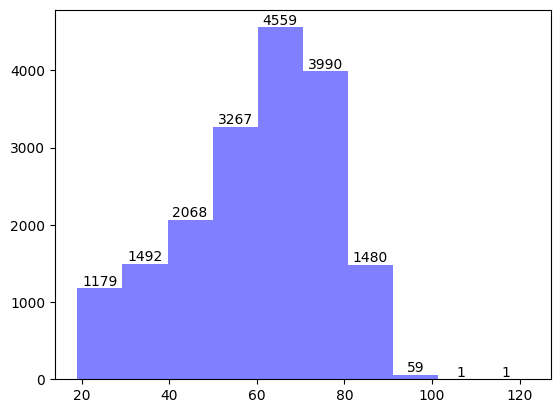

In [58]:
print('여성 나이 분포')
print(adult_train[adult_train['GENDER'] == 'FEMALE'].AGE.describe())
counts, edges, bars_1 = plt.hist(adult_train[adult_train['GENDER'] == 'FEMALE'].AGE,alpha=0.5, label = 'FEMALE',color='blue')
plt.bar_label(bars_1)

남성 나이 분포
count    16787.000000
mean        61.912194
std         15.988134
min         19.000000
25%         53.000000
50%         65.000000
75%         73.000000
max        122.000000
Name: AGE, dtype: float64


[Text(0, 0, '977'),
 Text(0, 0, '964'),
 Text(0, 0, '1416'),
 Text(0, 0, '2972'),
 Text(0, 0, '4939'),
 Text(0, 0, '4011'),
 Text(0, 0, '1441'),
 Text(0, 0, '64'),
 Text(0, 0, '0'),
 Text(0, 0, '3')]

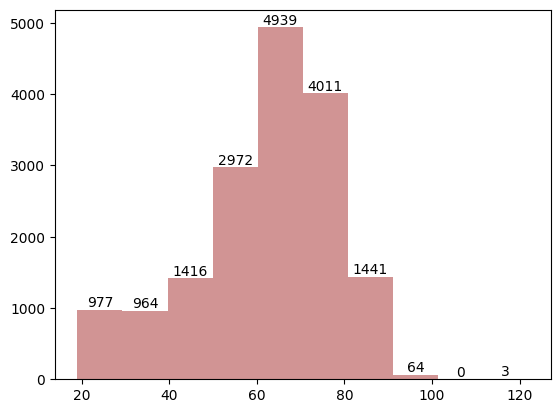

In [60]:
print('남성 나이 분포')
print(adult_train[adult_train['GENDER'] == 'MALE'].AGE.describe())
counts, edges, bars_2 = plt.hist(adult_train[adult_train['GENDER'] == 'MALE'].AGE,alpha=0.5, label = 'MALE',color = 'brown')
plt.bar_label(bars_2)

# Numpy 파일 확인

In [70]:
file_name = glob(pathname='./dataset/ECG_adult_numpy_train/*.npy')


In [96]:
array_1 = np.load(file_name[0])
print(file_name[0])

./dataset/ECG_adult_numpy_train\ecg_adult_0.npy


In [94]:
def array_to_dict_by_name(_array):
    _12lead = ['I', 'II', 'III', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'aVR', 'aVL', 'aVF']
    _dict = dict()
    for name, _array in zip(_12lead, np.split(array_1, 12)):
        _dict[name] = _array
    return _dict

In [95]:
array_to_dict_by_name(array_1)

{'I': array([ 12.,  12.,  12., ..., -28., -27., -26.]),
 'II': array([  8.,   8.,   8., ..., -34., -32., -30.]),
 'III': array([-4., -4., -4., ..., -6., -5., -4.]),
 'V1': array([  -2.,   -2.,   -2., ..., -102.,  -94.,  -86.]),
 'V2': array([  2.,   2.,   2., ..., -68., -57., -48.]),
 'V3': array([ 30.,  30.,  30., ..., -34., -28., -22.]),
 'V4': array([ -90.,  -90.,  -90., ..., -122., -115., -110.]),
 'V5': array([-20., -20., -20., ..., -98., -94., -90.]),
 'V6': array([ 6.,  6.,  6., ..., 70., 73., 74.]),
 'aVR': array([-10. , -10. , -10. , ...,  31. ,  29.5,  28. ]),
 'aVL': array([  8.,   8.,   8., ..., -11., -11., -11.]),
 'aVF': array([  2. ,   2. ,   2. , ..., -20. , -18.5, -17. ])}

# Child - Train set

나이 분포
count    8781.000000
mean        2.168157
std         1.944972
min         0.083333
25%         0.583333
50%         1.250000
75%         3.750000
max         8.083333
Name: AGE, dtype: float64


[Text(0, 0, '3112'),
 Text(0, 0, '2012'),
 Text(0, 0, '703'),
 Text(0, 0, '541'),
 Text(0, 0, '350'),
 Text(0, 0, '636'),
 Text(0, 0, '926'),
 Text(0, 0, '367'),
 Text(0, 0, '122'),
 Text(0, 0, '12')]

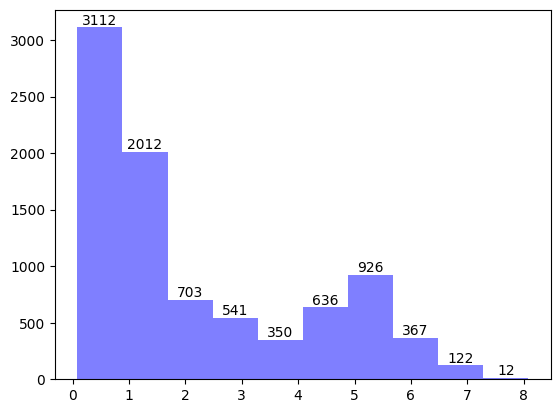

In [11]:
print('나이 분포')
print(child_train.AGE.describe())
counts, edges, bars_1 = plt.hist(child_train.AGE,alpha=0.5,color='blue')
plt.bar_label(bars_1)